In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [11]:
f = open("../ignore/analysis_1995/users_5n_and_top_20220829.txt", "r")
U = []
for item in f.readlines():
    user, _, _ = item.split()
    U.append(user)

In [12]:
N = np.load("users_5n_and_top_20220829.npy")

In [13]:
assert len(U) == len(set(U))
assert len(U) == len(N)

In [14]:
checked_users = set()
new_N = []
for i, user in enumerate(U):
    if user in checked_users:
        continue
    checked_users.add(user)
    new_N.append(N[i])

In [15]:
N = np.array(new_N).T

In [59]:
len(N[0])

1878

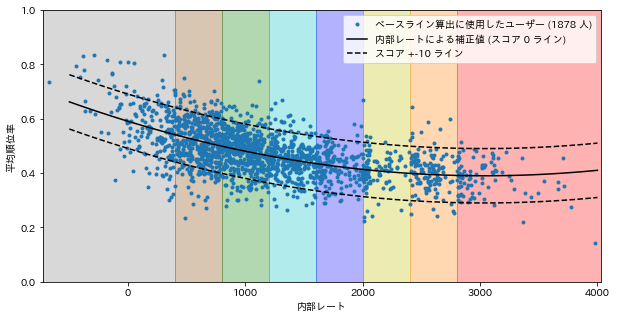

In [69]:
x = N[0]
y = N[1]

import japanize_matplotlib
fig = plt.figure(figsize=(10,5))

p2 = np.poly1d(np.polyfit(x, y, 2))
# p5 = np.poly1d(np.polyfit(x, y, 5))

xp = np.linspace(-500, 4000, 100)
# plt.vlines([0,3200], 0,1, color="k")


plt.plot(x, y, '.', color="#1f77b4", label="ベースライン算出に使用したユーザー (1878 人)")
plt.plot(xp, p2(xp), '-', color="k", label="内部レートによる補正値 (スコア 0 ライン)")
plt.plot(xp, p2(xp) + 0.1, '--', color="k", label="スコア +-10 ライン")
plt.plot(xp, p2(xp) - 0.1, '--', color="k")

# plt.plot(xp, p5(xp), '-')



cols = [
"#808080",
"#804000",
"#008000",
"#00C0C0",
"#0000FF",
"#C0C000",
"#FF8000",
"#FF0000",]

rates = [min(x)-50] + [i for i in range(400, 2801, 400)] + [max(x)+50]

for i, col in enumerate(cols):
    plt.axvspan(rates[i], rates[i+1],alpha=0.3,color=col)


plt.ylim(0,1)
plt.xlim(rates[0], rates[-1])
plt.xlabel("内部レート")
plt.ylabel("平均順位率")
plt.legend()

# plt.show()
# print(p2)
# print(np.corrcoef(x, y)[0,1])
plt.savefig("plot_baseline_20220829.png", format="png", dpi=300)

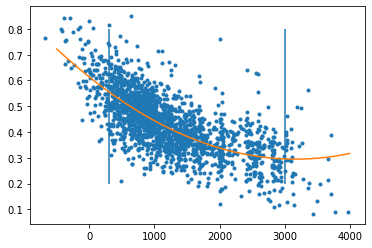

           2
3.175e-08 x - 0.000201 x + 0.6133
-0.6872511682785242


In [9]:
x = N[0]
y = N[2]
z = np.polyfit(x, y, 2)

p = np.poly1d(z)
xp = np.linspace(-500, 4000, 100)
plt.vlines([300,3000], 0.2, 0.8)

plt.plot(x, y, '.', xp, p(xp), '-')
plt.show()
print(p)
print(np.corrcoef(x, y)[0,1])